## 자동차 연비 분석 , 회귀분석 모델 + 산점도 이용해보기. 
### 자동차 연비 데이터 가져오기. 
### 공식 사이트 : https://archive.ics.uci.edu/
### 검색어 : auto 

In [1]:
# auto-mpg.csv 를 읽어서 확인해보기. 
import numpy as np 
import pandas as pd 
# header = 0 -> csv 의 컬럼 -> df 의 컬럼으로 사용. 
data_df = pd.read_csv("./auto-mpg.csv", header = 0 , engine="python")
print(f"data_df 의 크기 : {data_df.shape}")
data_df.head()

data_df 의 크기 : (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,orgin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
# 특정 컬럼 제외하기. horsepower , orgin , car_name
data_df = data_df.drop(["horsepower", "orgin", "car_name" ], axis=1, inplace=False)
data_df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [3]:
# 기본 컬럼 조사, info() 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [4]:
# 선형 회귀 분석 모델을 활용해서 -> 자동차 연비가 , 어느 피쳐(독립변수, x)의 영향을 받는지 조사
# 선형(직선) 회귀분석을 이용해서 , 분석 모델을 구축 
from sklearn.linear_model import LinearRegression
# 학습용, 테스트용 데이터 분리해주기. 
from sklearn.model_selection import train_test_split
# 분석 평가지수, MSE(오류의 제곱 평균: 낮을수록 좋다. 모델의 예측값이, 실제값과 거의 비슷. )
# R^2, : 예측값 / 실제값 , 나눈 비율. 클수록 좋다. 모델의 예측값이, 실제값과 거의 비슷. 
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# X, Y 분할, 독립변수, 종속 변수를 나누는 작업. 
Y = data_df["mpg"]
# PRICE 를 제외한 나머지 변수를 가지고 오기. 
# axis= 1 -> 열 기준, 
# inplace= False : 원본에 영향을 주지 않겠다. 
X = data_df.drop(["mpg"], axis= 1 , inplace= False)

In [6]:
# 훈련용, 테스트용으로 데이터를 분리하는 작업. 
# test_size=0.3 비율 , 학습 데이터 : 70%, 평가 데이터 : 30%
# random_state=0 -> 동일한 방식으로 데이터 분할. -> 동일성 보장. 
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [7]:
print(f"X_train : {X_train.shape},X_test : {X_test.shape},Y_train : {Y_train.shape},Y_test : {Y_test.shape}")

X_train : (278, 5),X_test : (120, 5),Y_train : (278,),Y_test : (120,)


In [8]:
# 선형 회귀 분석 이용해서, 모델 생성 
lr = LinearRegression()

In [9]:
# 모델을 이용해서, 훈련하기. 모델 학습시키기
lr.fit(X_train, Y_train)

LinearRegression()

In [10]:
# 학습된 모델을 이용해서, 평가하기, 예측값을 이용해서, 실제값과 비교하기. 
# 예) 상용이가 70문제로 학습한 모델을, 테스트 확인 하는 작업,
# 예) 30문제로 평가하기. 예측값 구하기. 
y_predict = lr.predict(X_test)

In [11]:
# 평가 분석 지표 
# MSE : 오류의 제곱 평균
# R^2 Score :  예측값 / 실제값 나눈비율 
#Y_test : 답지, y_predict : 상용이가 학습해서, 시험친 결과 
mse = mean_squared_error(Y_test, y_predict)
# 4 -> 루트 4 -> 2, 값을 통일 시켰다. 나중에, 스케일링을 많이 함, 정규화등으로 고쳐야, 
# 통계시, 효율적으로 작업이 진행되므로, 그래서, 이런 작업을 많이 함. 
rmse = np.sqrt(mse)

r2_value = r2_score(Y_test,y_predict)

print(f"mse : {mse}, rmse : {rmse} ,r2_value : {r2_value}")

mse : 12.278239036609495, rmse : 3.5040318258556806 ,r2_value : 0.8078579451877166


In [12]:
# 선형 회귀 분석, 직선의 구성 요소 ,
#  y절편, 계수등에 대해서, 직선을 분석 해보기.
print(f"Y 절편의 값 : {lr.intercept_}")
# mpg	cylinders	displacement	weight	acceleration	model_year
# 독립변수의 계수값 
print(f"회귀 계수의 값 : {np.round(lr.coef_,1)}")

Y 절편의 값 : -17.548057223951837
회귀 계수의 값 : [-0.1  0.  -0.   0.2  0.8]


In [13]:
# mpg	cylinders	displacement	weight	acceleration	model_year 값 정리 
coef = pd.Series(data=np.round(lr.coef_,2), index= X.columns)
coef.sort_values(ascending = False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

# 직선 -> y = ax + b
# Y (mpg) = 0.76 x X(model_year) + 0.20 x X(acceleration) + ....
# 계수들은, 모델의 성능을 최적화 할 때, 사용이 되는 하이퍼 매개변수, 웨이트 값(비중값)

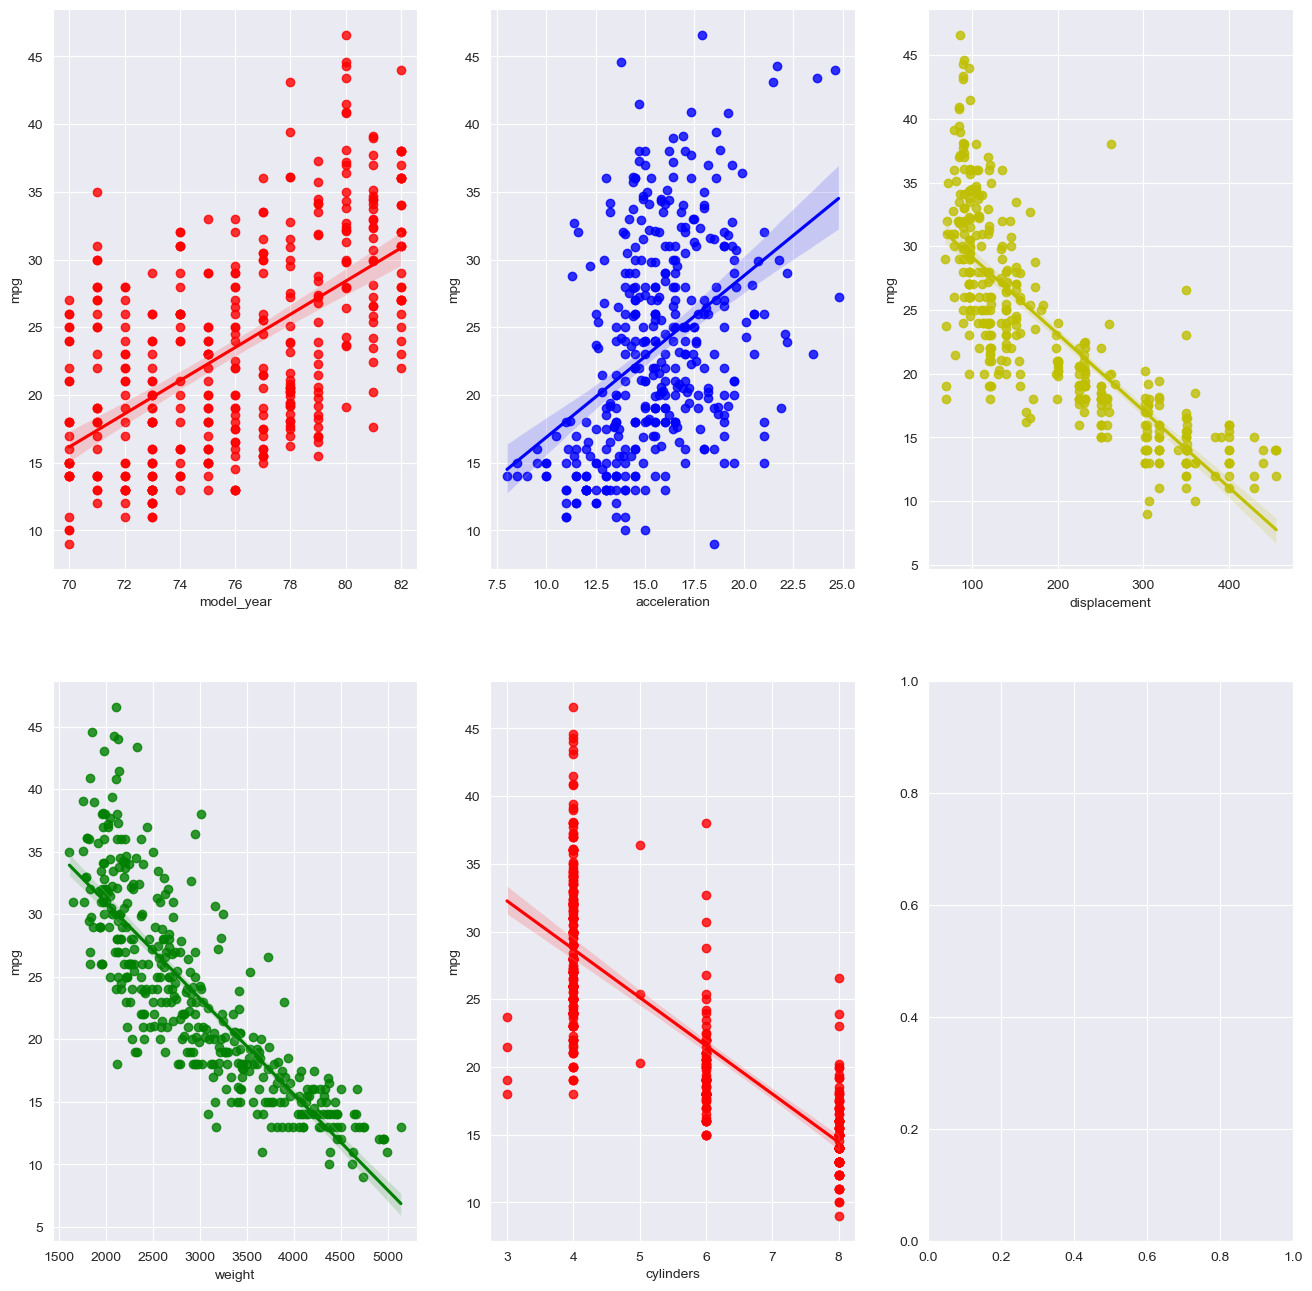

In [14]:
# 학습된 모델을 통해서, 예측값도 구하고, 실제값과 비교도하고, MSE R^2 , 평가 지표 
# 학습된 모델의 예측값, 실제값과 얼마나 일치하는 지를 조사. 
# 시각화 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 이미지들을 , 2 x 3 , 표 형태로 나타내기. 
fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 2)

x_features = ["model_year","acceleration","displacement","weight","cylinders"]

# 그래프의 색상 옵션 
plot_color = ["r","b", "y", "g", "r"]

for i, feature in enumerate(x_features):
  # 몫 -> 2개 행으로 
  row = int(i/3)
  # 나머지 -> 0,1,2 반복
  col = i % 3
  sns.regplot(x = feature, y="mpg", data = data_df, ax = axs[row][col], color = plot_color[i])